In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import turicreate

In [3]:
sales = turicreate.SFrame('home_data.sframe')
sales.save('home_data.csv', format='csv')

In [4]:
df =pd.read_csv('home_data.csv')

In [5]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df['id'].nunique()

21436

In [8]:
df['id'].unique()

array([7129300520, 6414100192, 5631500400, ..., 1523300141,  291310100,
       1523300157])

Text(0, 0.5, 'price')

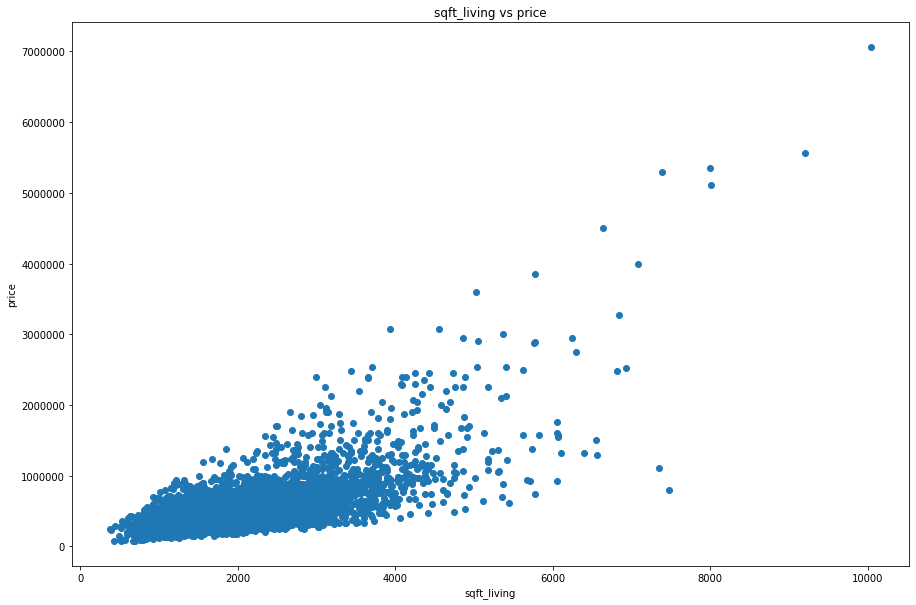

In [9]:
#df.plot(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

#df.plot(x="sqft_living", y="price")

import pandas as pd
import numpy as np

fig, ax =plt.subplots(figsize=(15,10))

ax.scatter(df[1:5000]['sqft_living'], df[1:5000]['price'])
ax.set_title('sqft_living vs price')
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')

#df.plot.scatter(x='a', y='b')


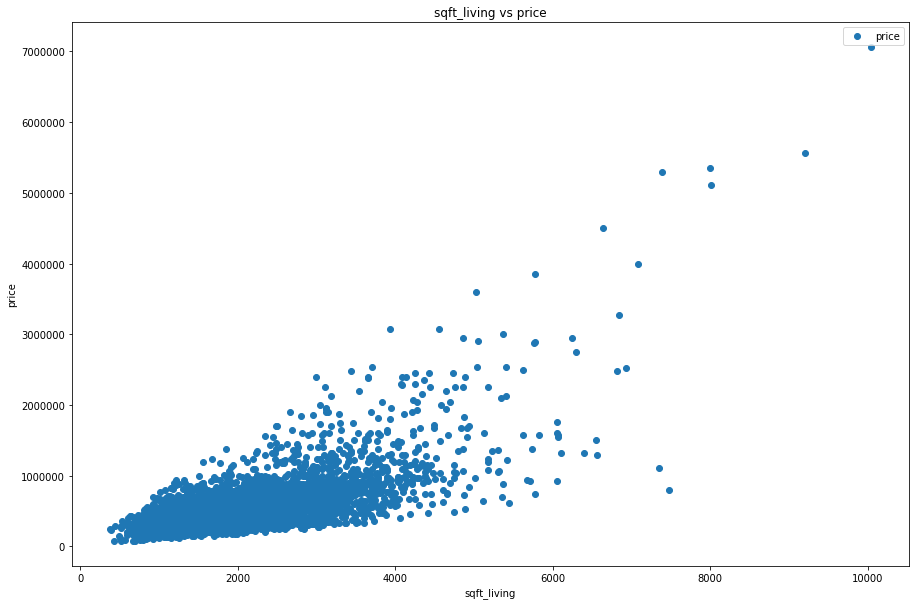

In [10]:
df[1:5000].plot(x='sqft_living', y='price', style='o', figsize=(15,10))
plt.title('sqft_living vs price')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
#training_set, test_set = df.random_split(.8,seed=0)

In [12]:
X_train.shape

(17290, 1)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
model=regressor.fit(X_train, y_train) #training the algorithm
print(regressor.score(X_test, y_test)) 


0.47915772372653753


In [14]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [[283.96855716]]


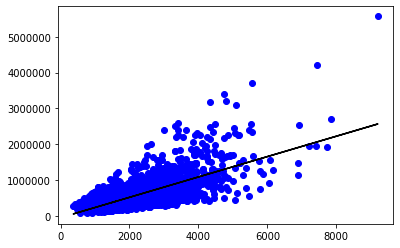

In [46]:
y_pred = model.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

In [47]:
y_pred.mean()

540646.1659483918

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 61940787124.62


In [50]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.48


In [51]:
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred

Actual     Predicted
0      297000.0  3.578180e+05
1     1578000.0  1.277876e+06
2      562100.0  3.606577e+05
3      631500.0  2.726274e+05
4      780000.0  8.547629e+05
...         ...           ...
4318   844000.0  8.292058e+05
4319   335500.0  3.095433e+05
4320   369950.0  3.379402e+05
4321   300000.0  2.215131e+05
4322   575950.0  4.174514e+05

[4323 rows x 2 columns]

## Working with smaller dataset

In [52]:
df_5000 = df[:][:5000]

In [53]:
df_5000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   date           5000 non-null   object 
 2   price          5000 non-null   float64
 3   bedrooms       5000 non-null   int64  
 4   bathrooms      5000 non-null   float64
 5   sqft_living    5000 non-null   int64  
 6   sqft_lot       5000 non-null   float64
 7   floors         5000 non-null   float64
 8   waterfront     5000 non-null   int64  
 9   view           5000 non-null   int64  
 10  condition      5000 non-null   int64  
 11  grade          5000 non-null   int64  
 12  sqft_above     5000 non-null   int64  
 13  sqft_basement  5000 non-null   int64  
 14  yr_built       5000 non-null   int64  
 15  yr_renovated   5000 non-null   int64  
 16  zipcode        5000 non-null   int64  
 17  lat            5000 non-null   float64
 18  long    

In [54]:
#df5000= df[0:5000]

In [55]:
#df5000.info()

In [56]:
X_5000 = df_5000['sqft_living'].values.reshape(-1,1)
y_5000 = df_5000['price'].values.reshape(-1,1)


X_train_5000, X_test_5000, y_train_5000, y_test_5000 = train_test_split(X_5000,y_5000, test_size=0.2, random_state=0)
#training_set, test_set = df.random_split(.8,seed=0)

In [57]:
regressor = LinearRegression()  
result_5000=regressor.fit(X_train_5000, y_train_5000) #training the algorithm
print(regressor.score(X_test_5000, y_test_5000)) 
#regressor.summary()
#print(regressor)

0.4653632887196228


In [58]:
import statsmodels.api as sm



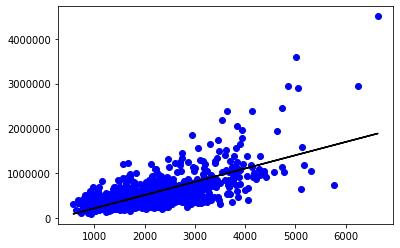

In [65]:
y_pred_5000 = result_5000.predict(X_test_5000) 
plt.scatter(X_test_5000, y_test_5000, color ='b') 
plt.plot(X_test_5000, y_pred_5000, color ='k') 
  
plt.show() 

In [66]:
#y_pred_5000

In [67]:
y_pred_5000.mean()

538895.2602981308

In [68]:
y_test_5000.mean()

544449.633

In [69]:
X_test_5000.mean()

2063.199

# Explore other features of the data


In [70]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [71]:
my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [72]:
X_exp = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']]
y_exp = df['price'].values.reshape(-1,1)


X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp,y_exp, test_size=0.2, random_state=0)

In [73]:
regressor_exp = LinearRegression()  
result2=regressor_exp.fit(X_train_exp, y_train_exp) #training the algorithm
print(regressor_exp.score(X_test_exp, y_test_exp))

0.4993592989265718


In [74]:
print(X_exp)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  zipcode
0             3       1.00         1180    5650.0     1.0    98178
1             3       2.25         2570    7242.0     2.0    98125
2             2       1.00          770   10000.0     1.0    98028
3             4       3.00         1960    5000.0     1.0    98136
4             3       2.00         1680    8080.0     1.0    98074
...         ...        ...          ...       ...     ...      ...
21608         3       2.50         1530    1131.0     3.0    98103
21609         4       2.50         2310    5813.0     2.0    98146
21610         2       0.75         1020    1350.0     2.0    98144
21611         3       2.50         1600    2388.0     2.0    98027
21612         2       0.75         1020    1076.0     2.0    98144

[21613 rows x 6 columns]


In [75]:
y_pred_exp = result2.predict(X_test_exp) 
y_pred_exp

array([[ 434034.00435752],
       [1292090.93878727],
       [ 422041.81914145],
       ...,
       [ 322799.30997653],
       [ 209079.01874932],
       [ 382571.52377538]])

In [76]:
y_pred_exp.mean()

539580.1060900615

# Apply learned models to make predictions

In [77]:
#house1 =df[df['id']=='7129300520']
house1 =df.loc[df['id'] == 5309101200]
#df.loc[df['column_name'] == some_value]

In [78]:
house1

id             date     price  bedrooms  bathrooms  sqft_living  \
1054  5309101200  20140605T000000  620000.0         4       2.25         2400   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1054    5350.0     1.5           0     0  ...      7        1460   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
1054            940      1929             0    98117  47.6763 -122.37   

      sqft_living15  sqft_lot15  
1054           1250        4880  

[1 rows x 21 columns]

In [79]:
print (house1['price'])

1054    620000.0
Name: price, dtype: float64


In [90]:
house1_sqft =house1[['sqft_living']]
house1_sqft

sqft_living
1054         2400

In [91]:
house1_exp=house1[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']]
house1_exp

bedrooms  bathrooms  sqft_living  sqft_lot  floors  zipcode
1054         4       2.25         2400    5350.0     1.5    98117

In [92]:
model.predict(house1_sqft)

array([[633267.47358128]])

In [93]:
result2.predict(house1_exp)

array([[637556.26218313]])